## Class 11
## Plotting Points data: 311 data 📲 📲 📲 📲 

UDM 2022 NYU @avigailvantu

Today we will continue to work with Pandas and Matplotlib. We will also create some maps using geopandas. Looking into 311 complaints from the past month and from the same period in 2019 we will compare, group and visualize the city’s trends. Along the way we will create a GeoDataFrame, this is a geographical format that is similar enough to a data frame but has an extra dimension of geographical attributes to it.  Think of the times where we loaded a CSV data into QGIS and needed to merge with a swapfile of assign column to a geographical unit.

This week we will be doing something similar, only with that we will transform a csv (which we will read into a data frame) and then assign columns in the data to represent geometry. That would enable us to then visualize the data quite easily. We’ll some pretty simple, yet cool, ways to do so!

Installing GeoPandas:
    
    https://geopandas.org/getting_started/install.html

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
from shapely.geometry import Point
#from geopandas import GeoDataFrame

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


For this assignment I downloaded the 311 data from the NYC Open Data platform. I wanted to look into how people in the city complaint patterns were in the past month. In order to get a relative understating I will compare the data from 2020 to the same dates last year. Comparing similar periods in between years is a common method in highlighting changes and trends.  Thinking about time series, many phenomenas are seasonal. Which is why comparing one month to the previous month (feb 2020 in our case) would be tricker. Having said that, even the same period in two separate years is likely to have some differences, but hopefully less. 

- Data 2020: March 13th 2020-April 13th 2020
- Data 2019: March 13th 2019-April 13th 2019 

Both datasets are in this repo, but you are welcome to download it yourself too 

In [3]:
#load 311 data 1 for this year and one for last year: 

data22 = pd.read_csv('311_Oct2022.csv')

#load 2019 data 

data21= pd.read_csv('311_Oct2021.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data22.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,55567159,10/01/2022 12:00:02 AM,10/01/2022 12:50:48 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11373.0,92-12 51 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740168,-73.871010,"(40.74016778489613, -73.87100960840758)"
1,55571180,10/01/2022 12:00:06 AM,10/01/2022 01:20:13 AM,NYPD,New York City Police Department,Non-Emergency Police Matter,Trespassing,Residential Building/House,10016.0,630 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.745155,-73.972500,"(40.745155331165606, -73.97250020902688)"
2,55565058,10/01/2022 12:00:22 AM,10/01/2022 02:32:27 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,10040.0,141 NAGLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.861031,-73.926276,"(40.86103107825989, -73.92627553723854)"
3,55568259,10/01/2022 12:00:30 AM,10/01/2022 12:53:05 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11103.0,42-18 31 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760454,-73.915276,"(40.76045412454783, -73.91527612392564)"
4,55567523,10/01/2022 12:00:54 AM,10/01/2022 05:01:12 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11369.0,32-04 86 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.757732,-73.881985,"(40.7577322343659, -73.88198481783013)"


In [5]:
data21.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,52044771,10/01/2021 12:00:00 AM,10/01/2021 02:19:31 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,672 EAST 231 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.892385,-73.859216,"(40.89238451539139, -73.8592161325675)"
1,52043847,10/01/2021 12:00:03 AM,10/01/2021 02:19:20 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,672 EAST 231 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.892385,-73.859216,"(40.89238451539139, -73.8592161325675)"
2,52040915,10/01/2021 12:00:04 AM,10/01/2021 12:13:01 AM,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,10035.0,2232 THIRD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.801403,-73.937506,"(40.80140331720816, -73.93750610651527)"
3,52038076,10/01/2021 12:00:41 AM,10/01/2021 04:46:14 AM,NYPD,New York City Police Department,Encampment,NaN,Subway,NaN,NaN,...,NaN,NaN,NaN,D,NaN,Grand St & Chrystie St,Entrance,40.718145,-73.993831,"(40.71814457272035, -73.99383128815022)"
4,52035597,10/01/2021 12:00:44 AM,10/01/2021 12:53:43 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10453.0,2076 CRESTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.853689,-73.903955,"(40.85368904676198, -73.90395513624917)"


In [8]:
print ('shape 2022',data22.shape)
print ('shape 2021',data21.shape)

shape 2022 (257869, 41)
shape 2021 (297489, 41)


What are the changes between 2019 and 2020 data in terms of quantities of non emargency complaints in NYC? 

In [9]:
#What are the columns in the data? 
print ('2022 columns:',data22.columns)
print ('2021 columns:',data21.columns)

2022 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')
2021 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Loca

# 311 data for 2021  and 2022 data by agency: 

Let's look into the "value_counts" function. That would return the number of values for each value in the Agencey column. Meaning we will get a list of how many complaints were chanaled into each agency. 

Check out this URL for the agencies acronyms
https://www1.nyc.gov/site/mocs/about/agencies-acronyms-initialisms.page

In [10]:
data21['Agency'].value_counts()

NYPD     120019
DSNY      58729
HPD       48978
DOT       17920
DEP       13299
DPR        9433
DOHMH      8555
DOB        7802
DHS        5929
EDC        2737
TLC        2034
DCA        1714
OSE         189
DOE         123
DOITT        14
DFTA         14
Name: Agency, dtype: int64

In [11]:
data20['Agency'].value_counts()

NameError: name 'data20' is not defined

- What are some of the differences in patterns we are seeing in which agencies the calls have been channeled to between 2019 and 2020?  Which agencies have been seeing less activity and which ones more? 

So far we worked mainly with Pandas (also some pyplot, numpy and datetime). In addiition to all these pacakges Pyhton also has some pretty neat geographical features! Let's check out a few of them on our data: 

## From DataFrame to GeoDataFrame 🧮

GeoDataFrame is a data frame that includes one column with a "special" status. This column is the "geometry" column which enbales Python to refer to the data as geogpraphical. In many cases, like in our case, we will not have the "geomtry" column built-in in the data. Instead, we will usually have x any y or Latitue and Longtitude that we will tranform into the needed format. 

To go from DataFRame---> GeoDataFrame:
- we would want to tell python which columns can be used as "geometry". 

Note that the Geometry columns looks like this


- POINT (LON LAT) 

The point() format will be created using the GeoDataFrame function. We will only need to tell Python which columns in the data are each (lon, lat).  


In [12]:
#transform data into geo data frame: 

gdf22 = gpd.GeoDataFrame(
    data22, geometry=gpd.points_from_xy(data22.Longitude, data22.Latitude))

gdf21 = gpd.GeoDataFrame(
    data21, geometry=gpd.points_from_xy(data21.Longitude, data21.Latitude))

#note that here we tell Python that the column: 
#data22.Longitude is the longtitute and data22.Latitude is the latitude. 

In [13]:
#check out our GeoDataFrame--> note the "geometry" column was added (all the way to the right)
gdf22.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,55567159,10/01/2022 12:00:02 AM,10/01/2022 12:50:48 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11373.0,92-12 51 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.740168,-73.871010,"(40.74016778489613, -73.87100960840758)",POINT (-73.87101 40.74017)
1,55571180,10/01/2022 12:00:06 AM,10/01/2022 01:20:13 AM,NYPD,New York City Police Department,Non-Emergency Police Matter,Trespassing,Residential Building/House,10016.0,630 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.745155,-73.972500,"(40.745155331165606, -73.97250020902688)",POINT (-73.97250 40.74516)
2,55565058,10/01/2022 12:00:22 AM,10/01/2022 02:32:27 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,10040.0,141 NAGLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.861031,-73.926276,"(40.86103107825989, -73.92627553723854)",POINT (-73.92628 40.86103)


## Now we can fianly visualize the data: 

First: plot all points for the layer, not I am setting the marker zise on 0.3 since there are so many of them!! 

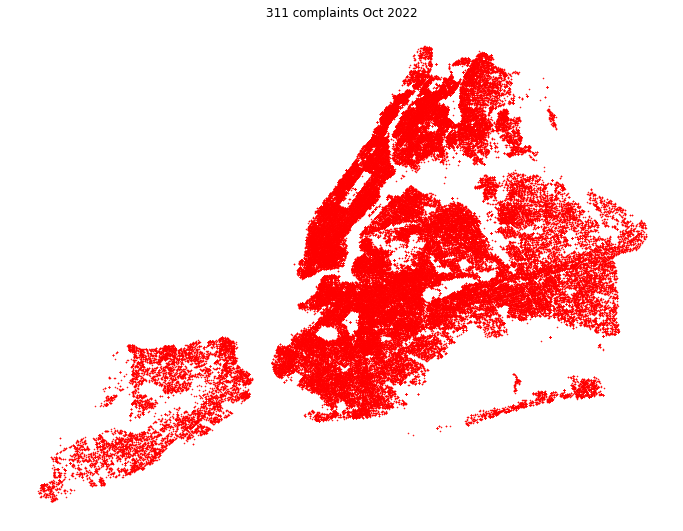

In [16]:
#plot all 2022 data:
gdf22.plot( color='red',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints Oct 2022')
plt.show()

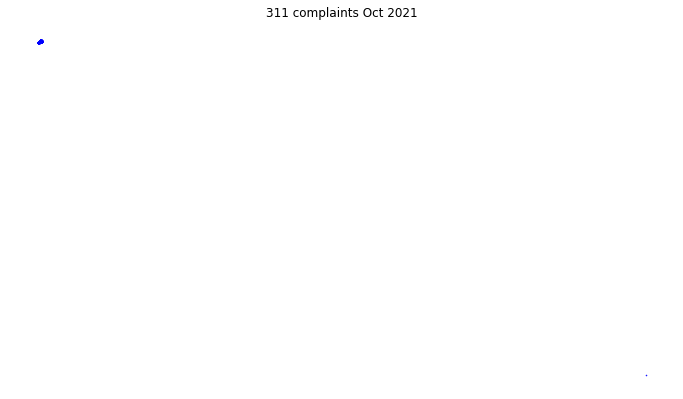

In [17]:
#plot all 2019 data: 
gdf21.plot( color='blue',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints Oct 2021')
plt.show()

# Exmine one agency: 
### HPD (Housing Preservation & Development)

In order to make better sense of what are people reporting less in these past weeks, we will take a closer look at the different agencies complaints. 

We will start with HPD: 

In [18]:
#filter only hpd

hpd21 = gdf21.loc[gdf21['Agency']=='HPD']
hpd22 = gdf22.loc[gdf22['Agency']=='HPD']

## Plot HPD data for both 2019 and 2020 

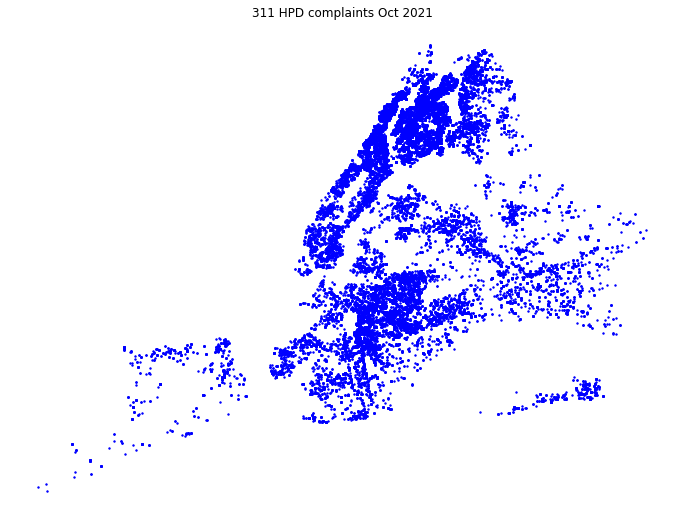

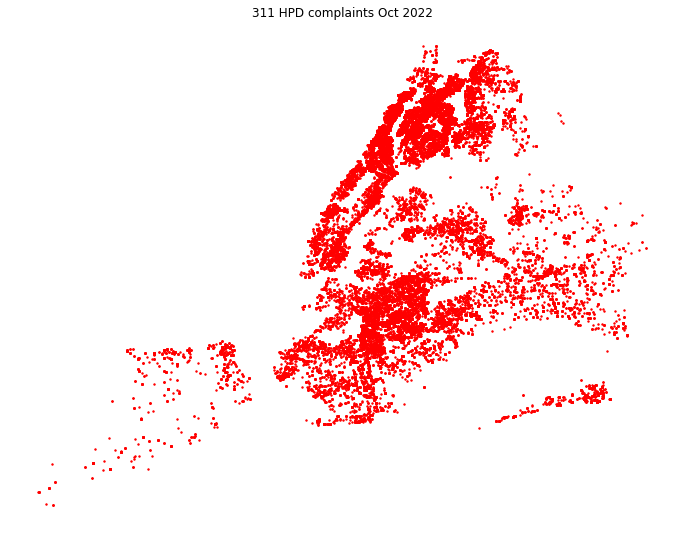

In [19]:
hpd21.plot( color='blue',legend=True,figsize=(12, 12), markersize=2)
plt.axis('off')
plt.title('311 HPD complaints Oct 2021')
hpd22.plot( color='red',legend=True,figsize=(12, 12),markersize=2)
plt.axis('off')
plt.title('311 HPD complaints Oct 2022')
plt.show()

 Q: Which areas seem to see the most impact in terms of "lost complaints"? 
 
## Another way for us to look into the data is to sub-slice it again: 

Now dive into the complaint types in the HPD complaints. So we can learn what are the types of housing complaint we are seeing. that would also help us compare what were some of the changes b/t both periods

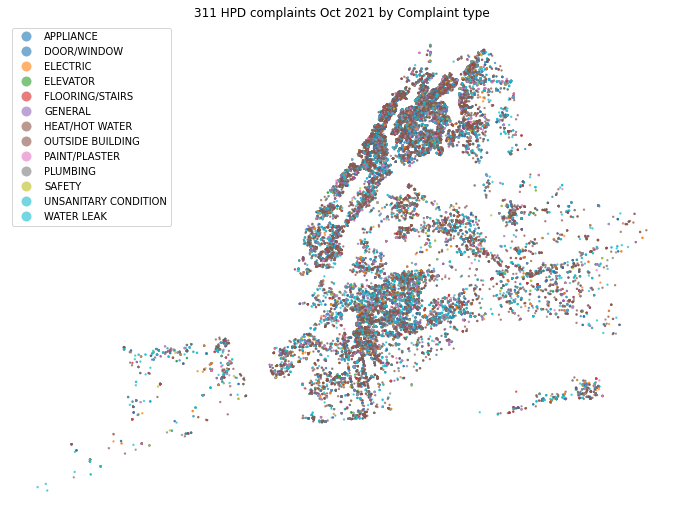

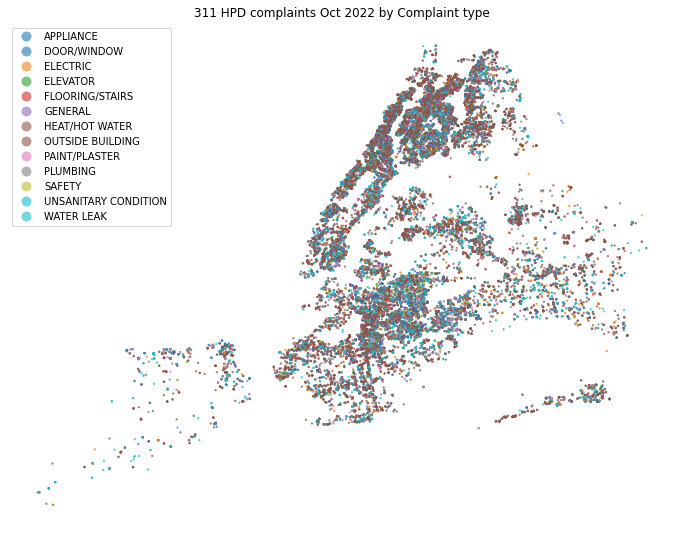

In [20]:
#plot hpd by complaint type:

#1. for 2019 
ax = hpd21.plot(column='Complaint Type',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints Oct 2021 by Complaint type')
plt.axis('off')
plt.show()


#2. for 2020 
ax = hpd22.plot(column='Complaint Type',legend=True,figsize=(12, 12),alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints Oct 2022 by Complaint type')
plt.axis('off')
plt.show()

What information can we take away from these two maps? 

# Another way to look into the complaint types: 
On top of visualizng the data we can also look into the number of complaints of each type. An easy way to do so is to use the Group.by command. This is a pretty timple command that has a lot of options (more about it on other classes!). 

The main thing to know about group.by right now is that group.by operates on a dataframe so that it basically does 3 main things: 

1. Split : take the data and splits it according to the grouping condition 
2. Apply: calculates what we want it to do: sum, means count etc
3. Combine: it combines the data into new groups 




In [21]:
hpd21['Complaint Type'].unique()

array(['HEAT/HOT WATER', 'WATER LEAK', 'DOOR/WINDOW',
       'UNSANITARY CONDITION', 'GENERAL', 'ELECTRIC', 'PLUMBING',
       'FLOORING/STAIRS', 'SAFETY', 'PAINT/PLASTER', 'APPLIANCE',
       'OUTSIDE BUILDING', 'ELEVATOR'], dtype=object)

In our case we will count group by complaint type so that: Python will Split the data according to each type of complaint (hot water, windows etc). Then it will Apply, meaning it would count how many of each compliant type the data has. Finally, Python will Combine the new grouped data. So in our case that would be number of complaints per each complaint type. Note that by doing so, our data frame structure will changes completely so that each row will represent a complaint type, and the data in the cells will be the count of how many of them are there in our data.  All that in one line of code :-) 

In [22]:
#group.by hpd complaints 

#1. for 2021
hpd21_count_type = hpd21.groupby(['Complaint Type']).count()
#1. for 2022
hpd22_count_type = hpd22.groupby(['Complaint Type']).count()

In [23]:
#look at out new data for 2021 
hpd21_count_type.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,1910,1910,1903,1910,1910,1910,1910,1910,1910,1910,...,0,0,0,0,0,0,1910,1910,1910,1910
DOOR/WINDOW,3531,3531,3497,3531,3531,3531,3531,3530,3531,3531,...,0,0,0,0,0,0,3530,3530,3530,3531
ELECTRIC,2162,2162,2152,2162,2162,2162,2162,2162,2162,2162,...,0,0,0,0,0,0,2162,2162,2162,2162
ELEVATOR,136,136,133,136,136,136,136,136,136,136,...,0,0,0,0,0,0,136,136,136,136
FLOORING/STAIRS,2203,2203,2195,2203,2203,2203,2203,2203,2203,2203,...,0,0,0,0,0,0,2203,2203,2203,2203


In [24]:
#and for 2020
hpd20_count_type.head()

NameError: name 'hpd20_count_type' is not defined

In [ ]:
#because the all columns look the same we will remove them and only keep the first one

hpd21_count_type = hpd21_count_type['Unique Key']
hpd22_count_type = hpd22_count_type['Unique Key']


In [ ]:
hpd21_count_type.head()

In [ ]:
#now let's see the most common HPD complaints for both Oct 2022 and 2021:

# sort data 

hpd21_count_type = hpd21_count_type.sort_values()

hpd22_count_type = hpd20_count_type.sort_values()

In [ ]:
#5 most common complaints in 2021 were: 
hpd21_count_type.tail(5)

In [ ]:

#5 most common complaints in 2020  were: 
hpd22_count_type.tail(5)

Question: What are some trends you are seeing between 2021 and 2022 


## Assignment:

So far we worked on the HPD data. 

We will now divide into groups, and each group will look into another agency complaints: 

# Group 1: NYPD
# Group 2: DOT 
# Group 3: DEP 
# Group 4: DSNY 
# Group 5: DOHMH 

For each groups: 

1. Please filter the subset of the data that has *YOUR* Agencey name
2. Plot,and  summarize the data for both 2021 and 2022 
 

- a. What are the patterns in *YOUR* agency complaints between the 2021 and 2022 data? 
    * what are the top compalint types you are seeing for each year? 
    * what are some similiraities and some diffrences between both years? 
    * what zip codes had the most amount of compaints in each year and how much was it? 
- b. What are some geogrpaphical patterns you are seeing comparing both years?




In [ ]:
#your code... 

In [ ]:
df = gpd.tools.geocode(  
        ["boston, ma", "1600 pennsylvania ave. washington, dc"]
    )